In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

1. **Exploring the Dataset**:
   a. Display the first 10 rows of the dataset.
   b. How many rows and columns does the dataset have?


In [2]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
titanic.shape

(891, 15)

2. **Using `.loc` and `.iloc` methods**:
   a. Select the rows from index 5 to 15 and columns "age" and "fare" using the `.loc` method.
   b. Select the first 5 rows and first 3 columns using the `.iloc` method.
   c. Find the age of the passenger at the 100th index using `.iloc`.

In [4]:
titanic.loc[5:15, ['age', 'fare']]

,age,fare
5,NaN,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708
10,4.0,16.7000
11,58.0,26.5500
12,20.0,8.0500
13,39.0,31.2750
14,14.0,7.8542


In [5]:
titanic.iloc[0:5, 0:3]

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [6]:
titanic.iloc[100].age

28.0

3. **Using `groupby()` and `aggregate()` methods**:
   a. Group the dataset by 'sex' and find the mean age for each gender.
   b. Group the dataset by 'class' (passenger class) and find the maximum and minimum age in each class.
   c. Group the dataset by both 'sex' and 'class'. Find the total number of passengers and the average fare for each group.

In [7]:
titanic\
    .groupby('sex')\
    .aggregate({'age': 'mean'})

,age
sex,
female,27.915709
male,30.726645


In [8]:
titanic\
    .groupby('class')\
    .aggregate({'age': ['min', 'max']})

age      
         min   max
class             
First   0.92  80.0
Second  0.67  70.0
Third   0.42  74.0

In [9]:
titanic\
    .groupby(['sex', 'class'])\
    .aggregate({'fare': ['mean', 'count']})

fare      
                     mean count
sex    class                   
female First   106.125798    94
       Second   21.970121    76
       Third    16.118810   144
male   First    67.226127   122
       Second   19.741782   108
       Third    12.661633   347

4. **Using Pivot Tables**:
   a. Create a pivot table that shows the median age of passengers for each combination of 'sex' and 'class'.
   b. Create another pivot table that shows the total fare collected for each combination of 'embark_town' and 'deck'.
   c. Plot a heatmap using seaborn to visualize the results of any one of the above pivot tables.


In [10]:
titanic\
    .pivot_table('age', index='sex', columns='class', aggfunc='median')

class,First,Second,Third
sex,,,
female,35.0,28.0,21.5
male,40.0,30.0,25.0


In [11]:
titanic\
    .pivot_table('fare', index='embark_town', columns='deck', aggfunc='count')

deck,A,B,C,D,E,F,G
embark_town,,,,,,,
Cherbourg,7,22,21,13,5,1,0
Queenstown,0,0,2,0,1,1,0
Southampton,8,23,36,20,26,11,4


<Axes: xlabel='deck', ylabel='embark_town'>

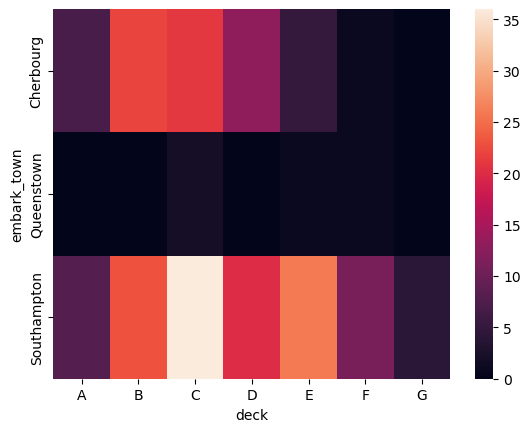

In [12]:
sns.heatmap(titanic\
    .pivot_table('fare', index='embark_town', columns='deck', aggfunc='count'))